# Project 1: Regression and Model Selection

In [ ]:
%matplotlib inline

# General math and plotting modules.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Machine Learning library.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
def generate_polynomial_data(num_points, noise, w):
    dim = w.size - 1
    # Generate feature vector

    # We often use np.random.seed for repeatability;
    # remove it if you want to inject randomness into your results
    np.random.seed(42)

    x = np.random.normal(size=(num_points, 1))
    x1 = np.power(x, 0)
    for d in range(dim):
        x1 = np.concatenate((np.power(x, 1 + d), x1), axis=1)  # X = [x, 1].
    y = np.dot(x1, w) + np.random.normal(size=(num_points,)) * noise  # y = Xw + eps

    return x1, y

def plot_data(X, Y, fig=None, options=dict()):
    if fig is None:
        fig = plt.subplot(111)
    fig.plot(X, Y, options.get('marker', 'b*'),
        label=options.get('label', 'Raw data'),
        fillstyle=options.get('fillstyle', 'full'),
        ms=options.get('size', 8))
    process_plot(fig, options)

def plot_fit(X, w, fig=None, options=dict()):
    if fig is None:
        fig = plt.subplot(111)

    x_min = np.min(X[:, -2])
    x_max = np.max(X[:, -2])
    dim = w.size - 1
    x_plot = np.reshape(np.linspace(x_min, x_max, 100), [-1, 1])
    x1_plot = np.ones_like(x_plot)
    for d in range(dim):
        x1_plot = np.concatenate((np.power(x_plot, 1 + d), x1_plot), axis=1)

    y_plot = np.dot(x1_plot, w)
    fig.plot(x_plot, y_plot, 'r-', label=options.get('label', 'Regression fit'))
    process_plot(fig, options)

def process_plot(fig, options=dict()):
    if 'x_label' in options.keys():
        fig.set_xlabel(options['x_label'])
    if 'y_label' in options.keys():
        fig.set_ylabel(options['y_label'])
    if 'x_lim' in options.keys():
        fig.set_ylim(options['x_lim'])
    if 'y_lim' in options.keys():
        fig.set_ylim(options['y_lim'])
    if 'title' in options.keys():
        fig.set_title(options['title'])
    if 'legend' in options.keys():
        if options['legend']:
            fig.legend(loc=options.get('legend_loc', 'best'))

### Data loader

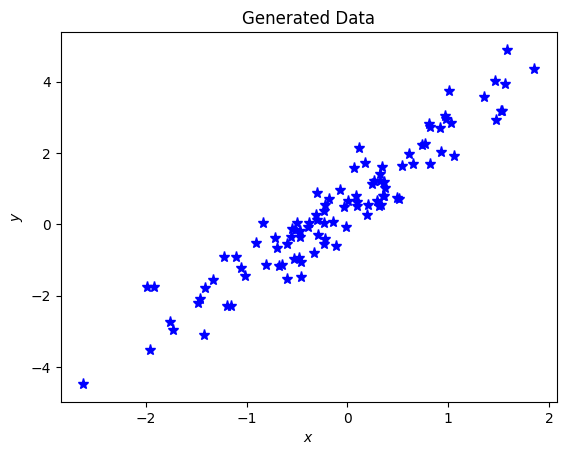

In [ ]:
# Generate the data.
num_points = 100  # Number of training points.
noise = 0.6  # Noise Level (needed for data generation).

w_true = np.array([2, 0.6]) # groundtruth function parameter

X, y = generate_polynomial_data(num_points, noise, w_true) # y = X w_true + noise

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

# Plot Data
fig = plt.subplot(111);
plot_opts = {'x_label': '$x$', 'y_label': '$y$', 'title': 'Generated Data', 'y_lim': [np.min(y)-0.5, np.max(y)+0.5]}
plot_data(X[:, 0], y, fig=fig, options=plot_opts)

### Modeling
Calculates empirical risk and its gradient at parameter $\theta$:

In [ ]:
import numpy.linalg as la

# Constructing the empirical risk function for ridge regression.
def lossFunction(theta, X, y ,Lambda):
    """
    Take in numpy array of theta, X, and y to return the regularize loss function and gradient
    of a logistic regression
    """
    # initialize regularized average loss (empirical risk) and its gradient
    regLoss = 0
    grad = np.zeros(theta.shape)

    # add your code to compute the ridge regression risk function and its gradient #

    # Calculate ridge regression risk function
    EVSum = np.sum((y.reshape(-1, 1)-X@theta)**2)

    avg = EVSum/y.shape[0]
    regLoss = avg + Lambda*theta.T@theta
    regLoss = regLoss[0][0]

    # Calculate gradient
    gradientSum = np.sum((y.reshape(-1, 1)-X@theta)*X, axis=0)
    grad = (-2/y.shape[0])*gradientSum + 2*Lambda*theta.T

    return regLoss, grad

# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))

# Set regularization parameter lambda
Lambda = 0.1
#Compute and display initial loss and gradient for regularized logistic regression
emp_risk, grad=lossFunction(initial_theta, X, y, Lambda)
print("Loss at initial theta (zeros):",emp_risk)

Loss at initial theta (zeros): 3.4740788381807888


### Gradient descent algorithm

Update params $\hat{\mathbf{w}}$:

$$ \hat{\mathbf{w}}_{k+1} \gets \hat{\mathbf{w}}_k - \eta_k \left.\frac{\partial \hat{R}}{\partial \mathbf{w}} \right|_{\mathbf{w}=\mathbf{w}_k},$$

where $\eta_k$ is a parameter of the algorithm, $k$ is the iteration index, and $\frac{\partial \hat{R}}{\partial \mathbf{w}}$ is the gradient of the empirical risk function w.r.t. $\mathbf{w}$.


The regularized theta using ridge regression:
 [[1.73309706]
 [0.57451649]]


Text(0.5, 1.0, 'Loss function using Gradient Descent')

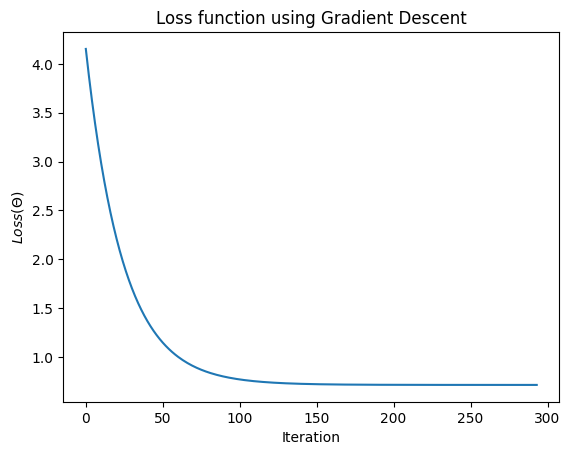

In [ ]:
def gradientDescent(X,y,theta,eta,Lambda,tolerance):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of eta

    return theta and the list of the loss of theta during each iteration
    """
    Loss_history =[]

    # add your code to compute the output of the gradient, as well as the loss histroy #
    while True:
        loss, grad = lossFunction(theta, X, y, Lambda)
        Loss_history.append(loss)
        theta = theta - eta*grad.T
        if len(Loss_history)>1:
            if abs(Loss_history[-2]-Loss_history[-1]) <= tolerance:
                break

    return theta, Loss_history

Eta = 0.01
Tolerance = 1e-6

theta, Loss_history = gradientDescent(X_train,y_train,initial_theta,Eta,Lambda,Tolerance)
print("The regularized theta using ridge regression:\n",theta)

plt.plot(Loss_history)
plt.xlabel("Iteration")
plt.ylabel("$Loss(\Theta)$")
plt.title("Loss function using Gradient Descent")


### Testing


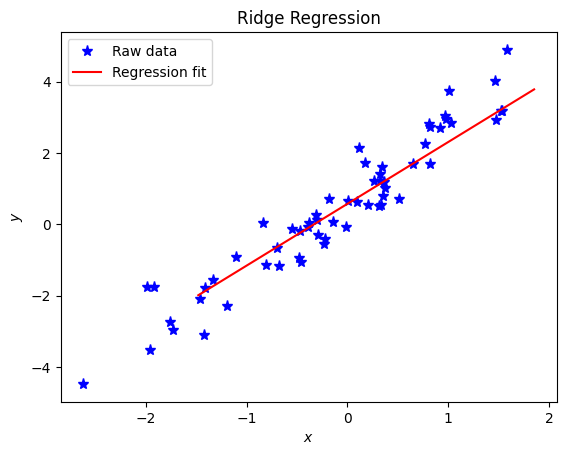

In [ ]:
# Plot predicted function
fig = plt.subplot(111)
plot_opts = {'x_label': '$x$', 'y_label': '$y$', 'title': 'Ridge Regression', 'legend': True,
                 'y_lim': [np.min(y)-0.5, np.max(y)+0.5]}

plot_data(X_train[:,0], y_train, fig=fig, options=plot_opts)
plot_fit(X_test, theta, fig=fig, options=plot_opts)


## House Value Prediction

We will use the [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from the scikit-learn package. The task is to predict the house values in California districts given some summary stats about them based on the 1990 census data.

In [ ]:
# python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import pandas as pd

california=fetch_california_housing()
california_df=pd.DataFrame(california.data,columns=california.feature_names)
california_df['Price']=california.target
california_df

newX=california_df.drop('Price',axis=1)
newY=california_df['Price']

newX = StandardScaler().fit_transform(newX)

In [ ]:
N_train = len(newX) * .8

np.random.seed(150)
msk = np.random.rand(len(newX)) < 0.8

X_train, y_train = newX[msk], newY[msk]
X_test, y_test = newX[~msk], newY[~msk]

### Training and evaluation

Fit the Ridge regression on the training data and calculate the MSE on the training set.


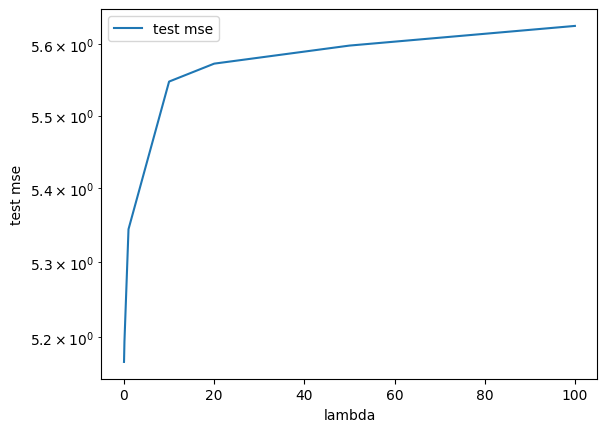

In [ ]:
def train_and_eval( X_train , y_train , X_eval , y_eval , lambda_ ):

  mse = 0

  theta_init = np.zeros((X_train.shape[1], 1))
  theta, loss_history = gradientDescent(X_train, y_train, theta_init, 0.01, lambda_, 1e-2)
  y_pred = X_eval@theta

  errorSum = np.sum((y_eval.reshape(-1, 1)-y_pred)**2)
  mse = errorSum / y_pred.shape[0]

  return mse

weight_list = [1e-10, 1e-6, 1e-4, 0.01, 0.1, 1, 10, 20, 50, 100]
result_list = []

# compute test MSE
for weight in weight_list:
    test_mse = train_and_eval ( X_train , y_train.to_numpy() , X_test , y_test.to_numpy() , weight )
    result_list.append ([ test_mse , weight ])
    result_array = np.array ( result_list )

plt.figure()
plt.plot( result_array [: , -1] , result_array [: ,0] , label = 'test mse')
plt.xlabel('lambda')
plt.ylabel('test mse')
plt.yscale('log')
plt.legend()
plt.show()

### Model selection via k-fold cross validation

*10-fold cross validation* on the training set to select $\lambda$ using MSE.

cross validation with lambda:  1e-10
cross validation with lambda:  1e-06
cross validation with lambda:  0.0001
cross validation with lambda:  0.01
cross validation with lambda:  0.1
cross validation with lambda:  1
cross validation with lambda:  10
cross validation with lambda:  20
cross validation with lambda:  50
cross validation with lambda:  100
Best lambda:  1e-10


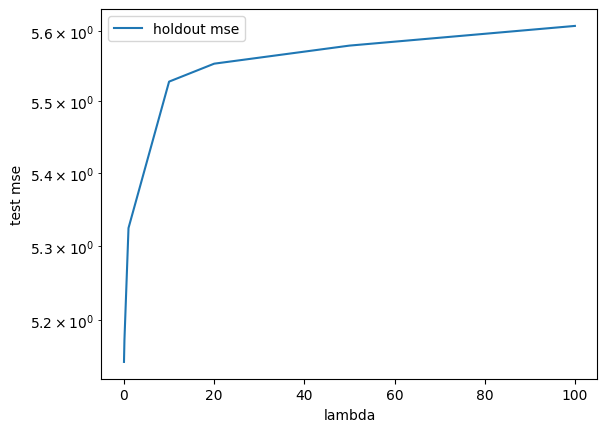

In [ ]:
def cross_validation(X_train, y_train, lambda_, k=10):
    """
    Perform k-fold cross validation on X_train and y_train.
    """
    # add your code to perform k-fold cross validation
    mse_list = []
    X_train_split = np.array_split(X_train, 10)
    y_train_split = np.array_split(y_train, 10)
    for i in range(10):
        X_train_ns = np.concatenate(X_train_split[:i]+X_train_split[i+1:])
        y_train_ns = np.concatenate(y_train_split[:i]+y_train_split[i+1:])
        X_test_ns = X_train_split[i]
        y_test_ns = y_train_split[i]

        mse_list.append(train_and_eval(X_train_ns, y_train_ns, X_test_ns, y_test_ns, lambda_))

    mse = sum(mse_list)/len(mse_list)

    return mse


result_list = []
result_list_shuffle = []

# List of lambdas to try
weight_list = [1e-10, 1e-6, 1e-4, 0.01, 0.1, 1, 10, 20, 50, 100]

best_lambda = None
best_mse = np.inf

p = np.random.permutation(len(X_train))
X_train_shuffle = X_train[p]
y_train_shuffle = y_train.to_numpy()[p]

# Find the best lambda
for lambda_ in weight_list:
    print("cross validation with lambda: ", lambda_)
    mse = cross_validation(X_train_shuffle, y_train_shuffle, lambda_)
    result_list.append ([ mse , lambda_ ])
    result_array = np.array ( result_list )
    if mse < best_mse:
        best_mse = mse
        best_lambda = lambda_

print("Best lambda: ", best_lambda)

plt.figure()
plt.plot( result_array [: , -1] , result_array [: ,0] , label = 'holdout mse')
plt.xlabel('lambda')
plt.ylabel('test mse')
plt.yscale('log')
plt.legend()
plt.show()

# LASSO Regression

Implement LASSO regression for [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html).

Lasso regression risk function:
$$ R({\mathbf{w}}) = \mathbb{E}[(y-{\mathbf{w}}^\top x)^2)] +  \lambda ||\mathbf{w}||_1$$

where the expectation is taken over the data generating the distribution of points. As the whole data generating distribution is not known, the expectation is approximated by samples from the **training** set.

The risk is approximated by the *empirical risk* as:

$$\hat{R}_{\text{lasso}}(\mathbf{w}) = \frac{1}{n} \sum_{i=1}^n \left(y_i - \mathbf{w}^\top \mathbf{x}_i\right)^2 + \lambda ||\mathbf{w}||_1$$

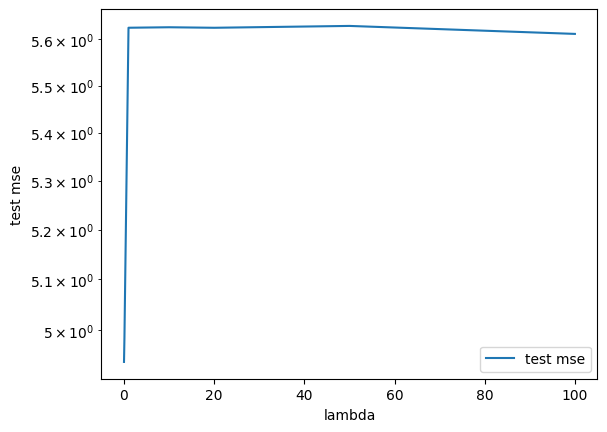

In [ ]:
# Constructing the empirical risk function for LASSO regression.
def lossFunctionLASSO(theta, X, y ,Lambda):
    """
    Take in numpy array of theta, X, and y to return the regularize loss function and gradient
    of a LASSO regression
    """
    # initialize regularized average loss (empirical risk) and its gradient
    regLoss = 0
    grad = np.zeros(theta.shape)


    # Calculate LASSO regression risk function
    EVSum = np.sum((y.reshape(-1, 1)-X@theta)**2)
    avg = EVSum/y.shape[0]
    regLoss = avg + Lambda*np.sum(np.absolute(theta))

    # Calculate gradient
    gradientSum = X.T@(X@theta-y.reshape(-1, 1))
    grad = (2/y.shape[0])*gradientSum + Lambda*np.sign(theta)
    return regLoss, grad

def gradientDescent(X,y,theta,eta,Lambda,tolerance,max_iters=100000):
    # you can reuse your code from ridge regression and modify it accordingly #
    Loss_history =[]

    for i in range(max_iters):
        loss, grad = lossFunctionLASSO(theta, X, y, Lambda)
        Loss_history.append(loss)
        theta = theta - eta*grad
        if len(Loss_history)>1:
            if abs(Loss_history[-2]-Loss_history[-1]) <= tolerance:
                break

    return theta, Loss_history

def train_and_eval( X_train , y_train , X_eval , y_eval , lambda_ ):
    # you can reuse your code from ridge regression and modify it accordingly #
    theta_init = np.zeros((X_train.shape[1], 1))
    theta, loss_history = gradientDescent(X_train, y_train, theta_init, 0.0001, lambda_, 1e-5, max_iters=100000)
    y_pred = X_eval@theta
    errorSum = np.sum((y_eval.reshape(-1, 1)-y_pred)**2)
    mse = errorSum / y_pred.shape[0]

    return mse

weight_list = [1e-10, 1e-6, 1e-4, 0.01, 0.1, 1, 10, 20, 50, 100]
result_list = []

# compute test MSE
for weight in weight_list:
    test_mse = train_and_eval ( X_train , y_train.to_numpy() , X_test , y_test.to_numpy() , weight )
    result_list.append ([ test_mse , weight ])
    result_array = np.array ( result_list )

plt.figure()
plt.plot( result_array [: , -1] , result_array [: ,0] , label = 'test mse')
plt.xlabel('lambda')
plt.ylabel('test mse')
plt.yscale('log')
plt.legend()
plt.show()